<a href="https://colab.research.google.com/github/toshkumarashu/repo1/blob/master/MachineLearining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Problem in Machine Learning **
Machine Learning is a branch of Artificial intelligence that enbaies computerprograms to automatically learn and improve from exprerince .
Machine Learning alogorithms learn from datasets and then based on the patterns identified from teh dsatasets make predictions on unseen data.
ML algorithms can be broadly categorized into two types:
Supervised Learning
Unsuptervised Learning

Supervised ML algorithms are those algorithms where the input dataset and the correspondng output or true prediction is availgbel and the algorithms try to find the relationship between inputs and outputs.
Suptervised learning algorithms are futher divided into two types:
Regression Algorithms
Classification Algorithms
Regressiion algorithms predict a continuous value for example, the price of a
house.
Classification algorithms predicts value e.g. whether a incoming email is Spam/Ham.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
tips_df=sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We will be using machine learning to predict the tip for a particular record based on the remaining features such as total_bill, gender, day, time etc.
Dividing Data into Features and Labels.

In [4]:
x=tips_df.drop(['tip'],axis=1)
y=tips_df["tip"]

In [5]:
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [6]:
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


Converting Categorical Data tgo Numbers
ML Algorithms can only work with numbers. It is important to convert categorical data into a numberic format Numeric Variables

In [7]:
numerical=x.drop(['sex','smoker','day','time'],axis=1)
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


DataFrames that contains only categorical columns

In [8]:
categorical=x.filter(['sex','smoker','day','time'])
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [9]:
categorical["day"].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Onle of the most common approcaches to convert a categorical columns to a numeric one is via one-hot encoding.
In one-hot encoding, for every unique value in the original columns, a new column is created

In [10]:
cat_numerical=pd.get_dummies(categorical)
cat_numerical.head()

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,False,True,False,True,False,False,False,True,False,True
1,True,False,False,True,False,False,False,True,False,True
2,True,False,False,True,False,False,False,True,False,True
3,True,False,False,True,False,False,False,True,False,True
4,False,True,False,True,False,False,False,True,False,True


The final step is to join the numrical columns with the one-hot encoded columns.

In [11]:
x=pd.concat([numerical,cat_numerical],axis=1)
x.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,False,True,False,True,False,False,False,True,False,True
1,10.34,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3,True,False,False,True,False,False,False,True,False,True
3,23.68,2,True,False,False,True,False,False,False,True,False,True
4,24.59,4,False,True,False,True,False,False,False,True,False,True


Divide Data into Training and Test Sets
we divide the dataset into two sets i.e. train and test set.
The dataset is trained via the train set aand evaluated on the test set.

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Data Scaling Normalization
The final step before data is passed to ML algorithm is to scale the data.
Some columns of the dataset contain small values, while the others contain every large values. it is better to convert all values to a uniform scale

In [13]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

We have converted data into a format that can be sued to train ML algorithms for rregression.
Linear Regression
Linear Regression is a linear model that assumes alinear relationship between inputs and outputs and minimizes the cost of error between the prediction and actueal output using functions like mean absoulte error.
Advantages
Linear Regression is a simpule to implement and easily interpretable algorithm.
it takes less time to train, even for huge datasets.
Linear Regression coefficients are easy to interpret.
Importing linear regression model form sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg=LinearRegression()
regressor=lin_reg.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

Once you have trained a model and have made predictions on the test set, the next step is to know how well your model has performed for making predictions on the nknown test set.
There are various metrics  to check that.
Mean Abolute Error(MAE) is calculated by taking the average of absolute error obrained bye subtracting real vaues from predicted vaues..
Mean Squared Error (MSE) is similar to MAE. However, the error for each record is squared in case of MSE
Root Mean Squared Error(RMSE) is the under root of mean squared error

In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('MEan Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 0.708021883297983
MEan Squared Error: 0.8939195221609614
Root Mean Squared Error 0.9454731736865734


By lokking at the MAE, it can be concluded that, on average there is an error of 0.70 for predictions, which means that on average there is an error of 0.70 for predictions, which means that on average, the pedicted tip vaues are 0.70$ more or less than the actual tip values.

# **Random Forest Regression**
Random Forest is tree-based algorithm.
Ensemble modellng technique
Advatages
You have lots of missing data or imbalance dataset(0(200) and 1(1000)).
With a large number of tress or models, you can avoid overfitting. Overfitting occurs when ML models performs etter on the training set but worse on the test set

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(random_state=42,n_estimators=500)
regressor=rf_reg.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [18]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 0.6977134693877551
Mean Squared Error: 0.7840190285387771
Root Mean Squared Error: 0.8854484900539258


# **Classification Problems in Machine Learining**
Classification problems are the type fo problems where you have to predict a discrete value i.e. whether the student will pass the exam or not

In [19]:
import pandas as pd
import numpy as np

In [21]:
churn_df=pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The exited columns information regarding whether or not the customer exited the bank after six months.
Removing unncesssary columns.

Dividing Data into Features and Labels

In [22]:
x=churn_df.drop(['Exited'],axis=1)
y=churn_df['Exited']

In [23]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [24]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [25]:
numerical=x.drop(['Surname','Geography','Gender'],axis=1)
numerical.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10


In [26]:
categorical=x.filter(['Geography','Gender'])
categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [27]:
cat_numeical=pd.get_dummies(categorical)
cat_numeical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,True,False,False,True,False
1,False,False,True,True,False
2,True,False,False,True,False
3,True,False,False,True,False
4,False,False,True,True,False


In [28]:
x=pd.concat([numerical,cat_numeical],axis=1)
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


Dividing Data into Training and Test sets

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Data Scaling/Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Binary Classification problems are those classification problems where there are only two possible values for the output label.
Whether a customer will leave the bank after a certain period or not.
Logistic Regression
Logistic Regression is alinear model, which makes classification by passing the output of linear regression through a sigmoid function.
Importing logistic regressioin classifier from sklearn

In [31]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression()
classifier=log_clf.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

There are various metrics to evaluate a classification method.
SOme of the most commonly used classification metrics are F1 score, recall, precision, accuracy and confusion matrix.
True Negatives:(TN/tp) True negatives are those output labels that are actually false and the model also predicted them as false.
True Positive:(TP/tp) True positive are those labels that are actually true and also predicted as true by the model
False Negative:(FP/fp) False Negatives are labels that are actually true gut model predicted as false
False Psositive : (FP/fp) False positives are labels that are actually false but predicted as true by the model

Precision
It is obtained by dividing true positives by the sum of positive and false positive
Precision=tp/(tp+fp)
Recall
It is calculated by dividing true positives by the sum of true positives and false negative
Recall=tp/(tp+fn)
Evaluatin the algorithm on the test set

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1527   68]
 [ 310   95]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.23      0.33       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42,n_estimators=500)
classifier=rf_clf.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1536   59]
 [ 199  206]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.78      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.871


# Clustering
Clustering algorithms are unsupervised algorithms where the training data is not labeled.
Rather, the algorithms cluster or group the datasets based on common characteristics.
K-Means Clustering
K-Means clutering is one of the most commonly used algorithms for clustering. K refers to the number of clusters that you want your data to be grouped into.
Steps for K-Means Clustering
Randomly assign centroid values for each cluster
Calcuate the eculidean distance between each data point and centroid values of all the clusters.
Assign the data point to the cluster of the centroid with the shorest distance.
Calculate and update centroid values based on the mean vaues of the coordinates of all the data points of the coresponding cluster.
Repeat seps 2-4 until new centroid values for all the

In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Customer Segmentation using K-Means Clustering
In this project you will see how to segment customers based on their incmes and past spending habits.
You will then identify customers who have high incomes and higer spending.

In [36]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
dataset.shape

(200, 5)

The output shows that the dataset contains 200 records and 5 columns
Plotting the histogram for the annual income column

<Axes: xlabel='Annual Income (k$)'>

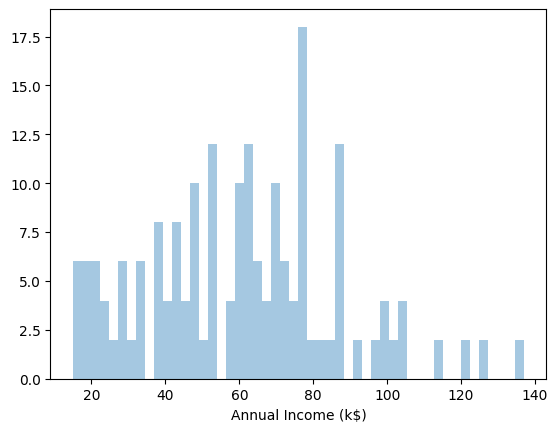

In [38]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(dataset["Annual Income (k$)"],kde=False,bins=50)

The output shows that most of the customers have incomes between 60 and 90K per year.
Plotting the histogram for the spending score column

<Axes: xlabel='Spending Score (1-100)'>

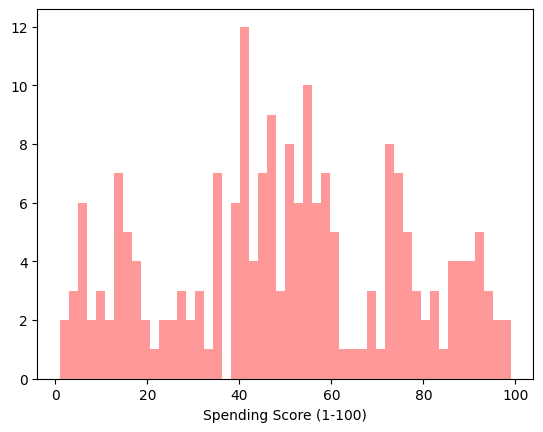

In [39]:
sns.distplot(dataset["Spending Score (1-100)"],kde=False,bins=50,color="red")

The output show that most of the customers have a spending score between 40 and 60
Plotting regression plot for annual invome against spending score

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

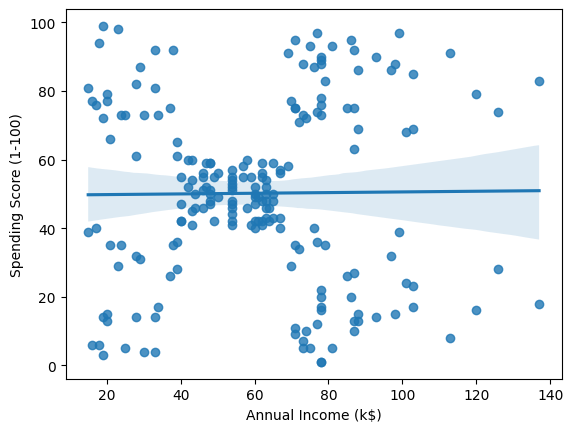

In [40]:
sns.regplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=dataset)

There is no linear relationship between annual income and spending
Plotting regression plot for age and spending score

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

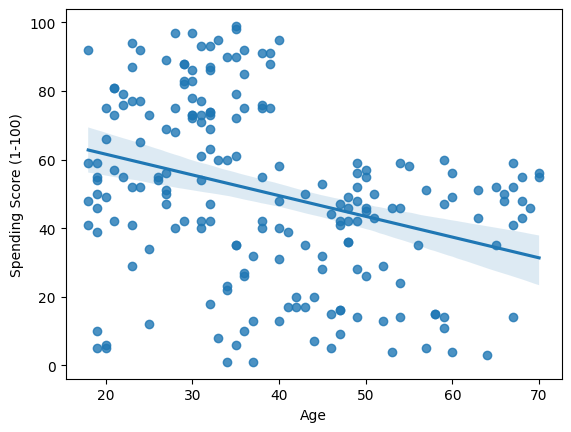

In [41]:
sns.regplot(x="Age",y="Spending Score (1-100)",data=dataset)

The output confirms an inverse linear relationship between age and spending score.
Young people have higher spending compared to older people.

In [99]:
dataset=dataset.filter(["Annual Income (k$)","Spending Score (1-100)"],axis=1)
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [100]:
km_model=KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [101]:
print(km_model.cluster_centers_)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [48.26       56.48      ]]


In [102]:
print(km_model.labels_)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


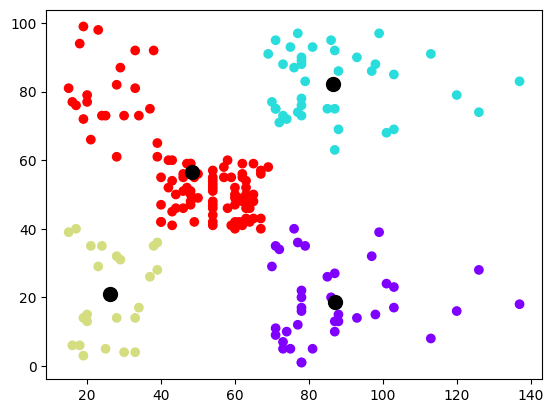

In [103]:
plt.scatter(dataset.values[:,0],dataset.values[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

Elbow method to get the optimal number fo clusters

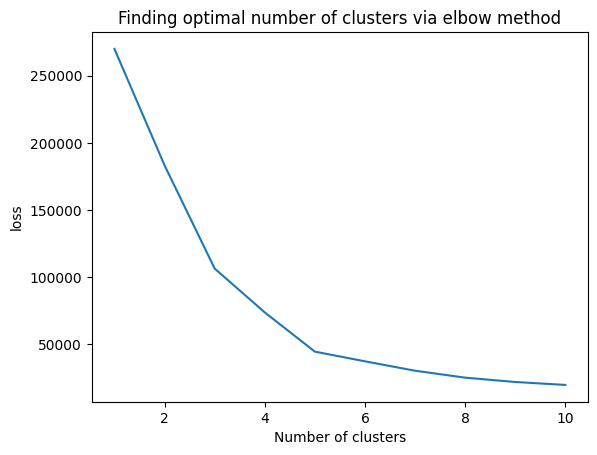

In [104]:
loss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i).fit(dataset)
  loss.append(km.inertia_)

plt.plot(range(1,11),loss)
plt.title('Finding optimal number of clusters via elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('loss')
plt.show()

In [113]:
km_model=KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

In [114]:
print(km_model.cluster_centers_)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [115]:
print(km_model.labels_)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


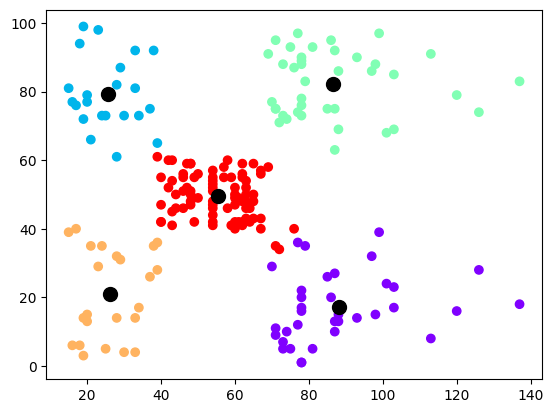

In [116]:
plt.scatter(dataset.values[:,0],dataset.values[:,1],c=km_model.labels_,cmap='rainbow')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],s=100,c='black')

Filtering all records with cluster id 1

In [117]:
cluster_map=pd.DataFrame()
cluster_map['data_index']=dataset.index.values
cluster_map['cluster']=km_model.labels_
cluster_map

,data_index,cluster
0,0,3
1,1,1
2,2,3
3,3,1
4,4,3
...,...,...
195,195,2
196,196,0
197,197,2
198,198,0


In [119]:
cluster_map=cluster_map[cluster_map.cluster==1]
cluster_map.head()

,data_index,cluster
1,1,1
3,3,1
5,5,1
7,7,1
9,9,1


These are the customers who have high incomes and high spending and these customers should be targeted during marketing campaign